# Problem 1:Prediction task is to determine whether a person makes over 50K a year.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.cross_validation import train_test_split
%matplotlib inline

C:\Python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Marital_Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital_Gain", "Capital_Loss",
        "Hours_per_week", "Country", "Target"],
        sep=',')

In [3]:
df= pd.DataFrame(data)

In [4]:
data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
set(data['Workclass'])

{' ?',
 ' Federal-gov',
 ' Local-gov',
 ' Never-worked',
 ' Private',
 ' Self-emp-inc',
 ' Self-emp-not-inc',
 ' State-gov',
 ' Without-pay'}

In [6]:
data['workclass_num'] = data.Workclass.map({' Private':0, ' State-gov':1, ' Federal-gov':2, ' Self-emp-not-inc':3, ' Self-emp-inc':4, ' Local-gov':5, ' Without-pay':6, ' ?':7,' Never-worked':8}).astype(int)
data['over50K'] = data['Target'].map({' <=50K': 0, ' >50K': 1}).astype(int)
data['marital_num'] = data['Marital_Status'].map({' Married-spouse-absent': 0, ' Widowed': 1, 
                                                             ' Married-civ-spouse': 2, ' Separated': 3, ' Divorced': 4, 
                                                             ' Never-married': 5, ' Married-AF-spouse': 6}).astype(int)
data['race_num'] = data['Race'].map({' Black': 0, ' Asian-Pac-Islander': 1, ' Other': 2, ' White': 3, 
                                             ' Amer-Indian-Eskimo': 4}).astype(int)
data['sex_num'] = data['Sex'].map({' Male': 0, ' Female': 1}).astype(int)
data['rel_num'] = data.Relationship.map({' Not-in-family':0, ' Unmarried':0, ' Own-child':0, ' Other-relative':0, ' Husband':1, ' Wife':1})

In [7]:
data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital_Status,Occupation,Relationship,Race,Sex,...,Capital_Loss,Hours_per_week,Country,Target,workclass_num,over50K,marital_num,race_num,sex_num,rel_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,40,United-States,<=50K,1,0,5,3,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,13,United-States,<=50K,3,0,2,3,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,40,United-States,<=50K,0,0,4,3,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,40,United-States,<=50K,0,0,2,0,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,40,Cuba,<=50K,0,0,2,0,1,1


# Problem 2:Which factors are important

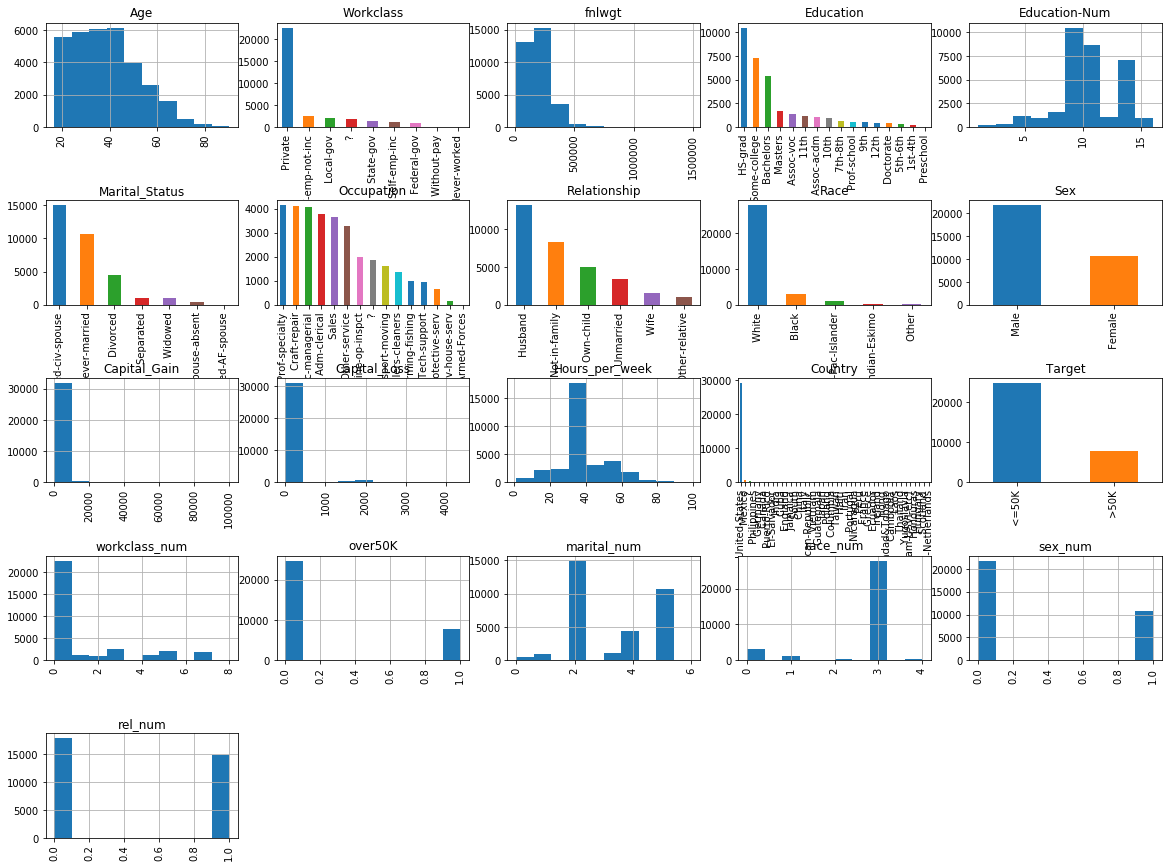

In [8]:
import matplotlib.pyplot as plt
from math import ceil
fig = plt.figure(figsize=(20,15))
cols = 5
rows = ceil(float(data.shape[1]) / cols)
for i, column in enumerate(data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data.dtypes[column] == np.object:
        data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

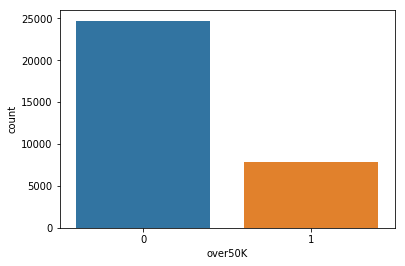

In [26]:
sns.countplot(data['over50K'],label="Count")
plt.show()

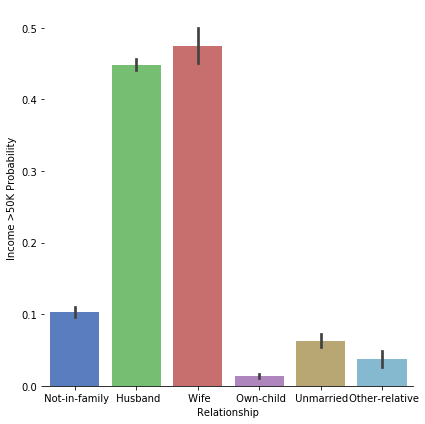

In [13]:
g = sns.factorplot(x="Relationship",y="over50K",data=data,kind="bar", size = 6 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

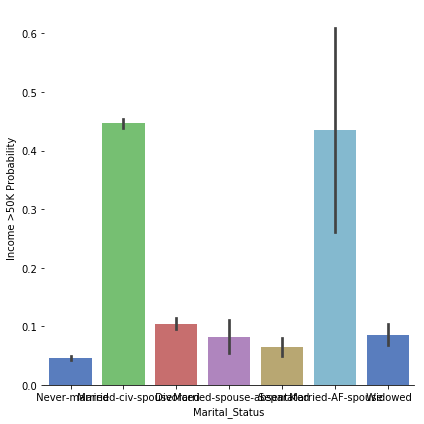

In [15]:
g = sns.factorplot(x="Marital_Status",y="over50K",data=data,kind="bar", size = 6 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

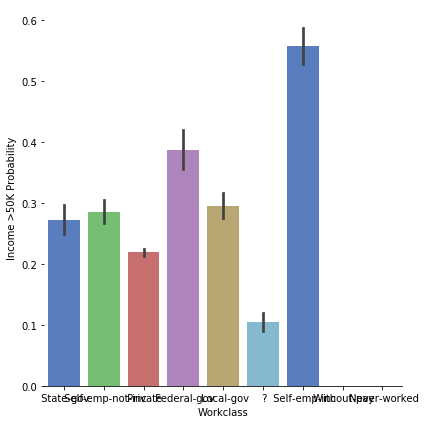

In [19]:
g = sns.factorplot(x="Workclass",y="over50K",data=data,kind="bar", size = 6 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

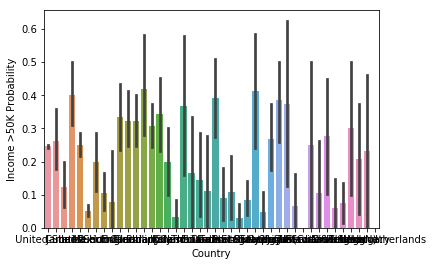

In [20]:
g = sns.barplot(x="Country",y="over50K",data=data)
g = g.set_ylabel("Income >50K Probability")
plt.show()

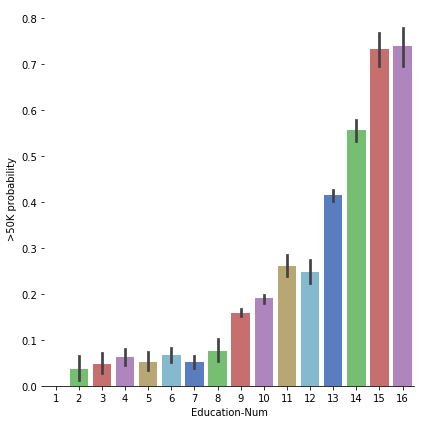

In [23]:
g = sns.factorplot(x="Education-Num",y="over50K",data=data,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

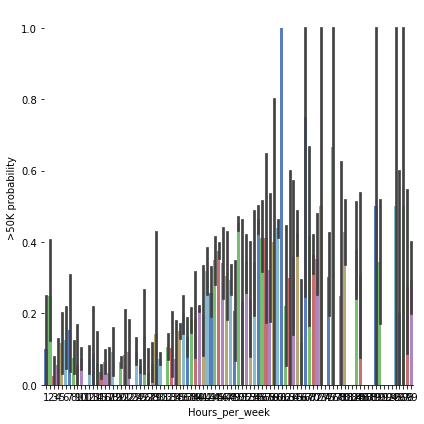

In [24]:
g  = sns.factorplot(x="Hours_per_week",y="over50K",data=data,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

C:\Python\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


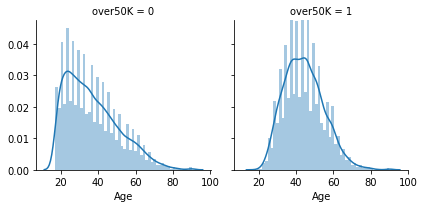

In [22]:
g = sns.FacetGrid(data, col='over50K')
g = g.map(sns.distplot, "Age")
plt.show()

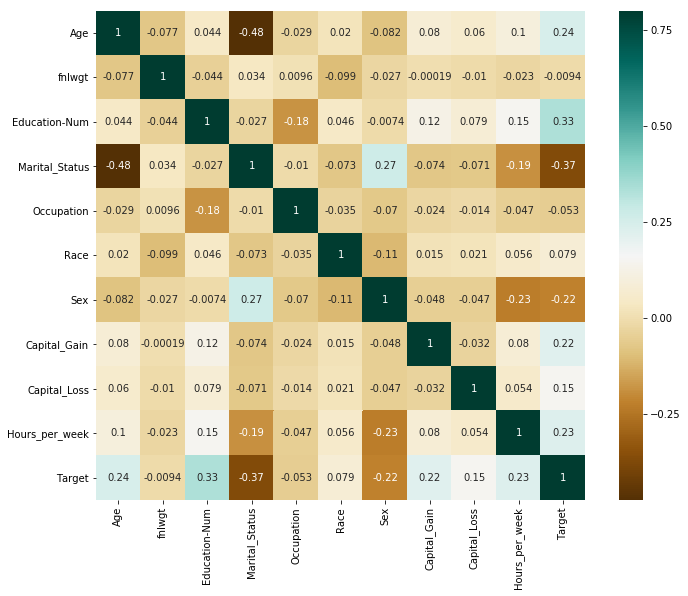

In [60]:
import seaborn as sns
hmap = df.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(hmap, vmax=.8,annot=True,cmap="BrBG", square=True);

In [22]:
X = data[['workclass_num', 'Education-Num', 'marital_num', 'race_num', 'sex_num', 'rel_num', 'Capital_Gain', 'Capital_Loss']]
y = data.over50K

In [23]:
data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital_Status,Occupation,Relationship,Race,Sex,...,Capital_Loss,Hours_per_week,Country,Target,workclass_num,over50K,marital_num,race_num,sex_num,rel_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,NaN,...,0,40,United-States,<=50K,1,0,5,3,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,NaN,...,0,13,United-States,<=50K,3,0,2,3,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,NaN,...,0,40,United-States,<=50K,0,0,4,3,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,NaN,...,0,40,United-States,<=50K,0,0,2,0,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,NaN,...,0,40,Cuba,<=50K,0,0,2,0,1,1


In [24]:
data["Sex"] = data["Sex"].map({"Male":1, "Female":0})
X=data[['Age','fnlwgt','Education-Num','marital_num','Sex','Capital_Gain','Capital_Loss','Hours_per_week']]
y = data.over50K

# Problem 3:Which algorithms are best for this dataset

In [56]:
def cap_split(row):
    if row['Capital_Gain'] > 0 and row['over50K'] == 1:
        return 1
    elif row['Capital_Gain'] > 0 and row['over50K'] == 0:
        return 2
    elif row['Capital_Gain'] <= 0 and row['over50K'] == 1:
        return 3
    else:
        return 4
    
data['cap_split'] = data.apply (lambda row: cap_split (row), axis=1)

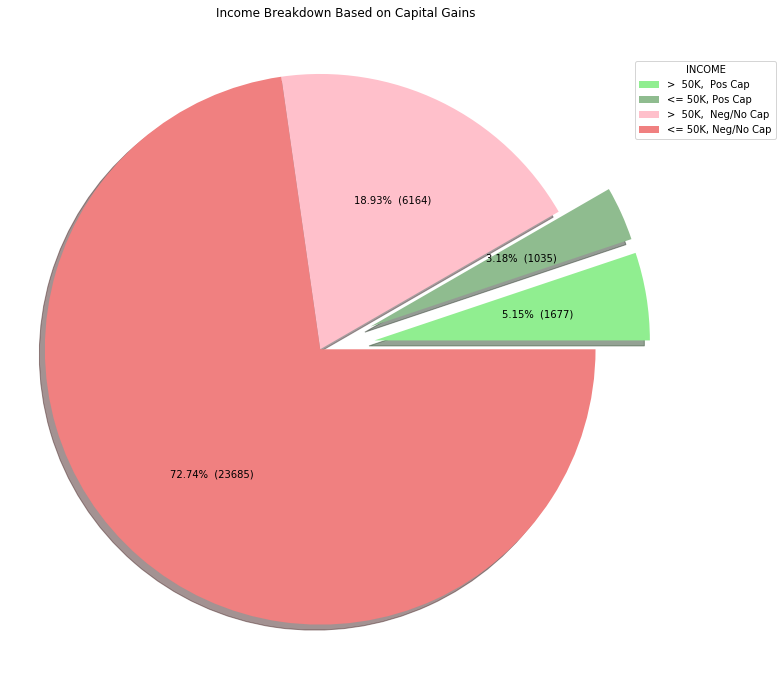

In [57]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
cap_split = data.cap_split.value_counts().sort_index()
colors = ['lightgreen', 'darkseagreen', 'pink', 'lightcoral']
explode = [0.2, 0.2, 0, 0]
label = ['>  50K,  Pos Cap', '<= 50K, Pos Cap', '>  50K,  Neg/No Cap', '<= 50K, Neg/No Cap']
fig = plt.figure(figsize=(12, 12)) 
ax = fig.add_subplot(1, 1, 1)
plt.pie(cap_split, shadow=True, colors=colors, explode=explode, autopct=make_autopct(cap_split))
plt.title('Income Breakdown Based on Capital Gains')
plt.axis('equal')
plt.legend(label, title='INCOME', bbox_to_anchor=(1.15, .95))

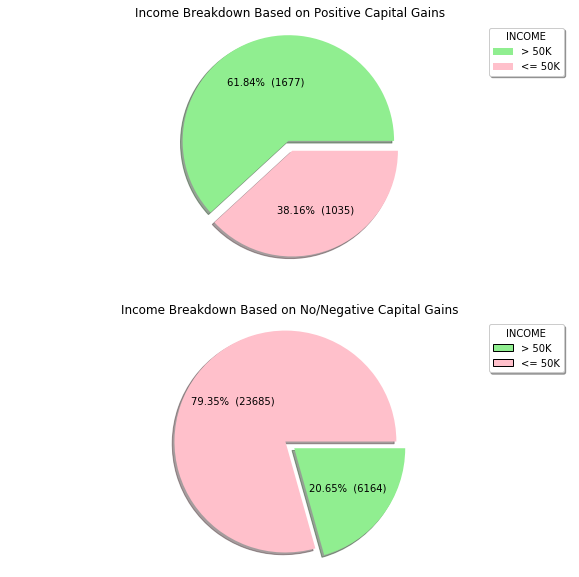

In [59]:
import matplotlib.patches as mpatches
%matplotlib inline

caphigh = data[data['Capital_Gain'] > 0]
caplow = data[data['Capital_Gain'] <= 0]

caphigh_val = caphigh.over50K.value_counts()
caplow_val = caplow.over50K.value_counts()
colors1 = ['lightgreen', 'pink']
colors2 = ['pink', 'lightgreen']

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 1, 1)
plt.pie(caphigh_val, shadow=True, explode=[0.1, 0], colors=colors1, autopct=make_autopct(caphigh_val))
plt.axis('equal')
plt.title('Income Breakdown Based on Positive Capital Gains')
plt.legend(labels=['> 50K', '<= 50K'], frameon=True, shadow=True, title='INCOME')

ax2 = fig.add_subplot(2, 1, 2)
plt.pie(caplow_val, shadow=True, explode=[0.1, 0], colors=colors2, autopct=make_autopct(caplow_val))
plt.axis('equal')
plt.title('Income Breakdown Based on No/Negative Capital Gains')
ax2_patch1 = mpatches.Patch(facecolor='lightgreen',  edgecolor='black', label='> 50K')
ax2_patch2 = mpatches.Patch(facecolor='pink',  edgecolor='black', label='<= 50K')
plt.legend(handles=[ax2_patch1, ax2_patch2], frameon=True, shadow=True, title='INCOME')
plt.show()

In [4]:
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
numeric_features = ['Age','fnlwgt','Education-num','Capital_Gain','Capital_Loss','Hours_per_week','Target']
cat_features = ['Workclass','Education','Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']

In [5]:
df["Workclass"] = df["Workclass"].fillna("X")
df["Occupation"] = df["Occupation"].fillna("X")
df["Country"] = df["Country"].fillna("United-States")
df.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_per_week    0
Country           0
Target            0
dtype: int64

In [6]:
df["Sex"]= df["Sex"].map({" Male":0," Female":1})

# Create Married Column - Binary Yes(1) or No(0)
df["Marital_Status"] = df["Marital_Status"].replace([' Never-married',' Divorced',' Separated',' Widowed'], 'Single')
df["Marital_Status"] = df["Marital_Status"].replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'], 'Married')
df["Marital_Status"] = df["Marital_Status"].map({"Married":1, "Single":0})
df["Marital_Status"] = df["Marital_Status"].astype(int)

# Drop the data you don't want to use
df.drop(labels=["Workclass","Education","Occupation","Relationship","Race","Country"], axis = 1, inplace = True)
print('Dataset with Dropped Labels')
print(df.head())

Dataset with Dropped Labels
   Age  fnlwgt  Education-Num  Marital_Status  Sex  Capital_Gain  \
0   39   77516             13               0    0          2174   
1   50   83311             13               1    0             0   
2   38  215646              9               0    0             0   
3   53  234721              7               1    0             0   
4   28  338409             13               1    1             0   

   Capital_Loss  Hours_per_week  Target  
0             0              40   <=50K  
1             0              13   <=50K  
2             0              40   <=50K  
3             0              40   <=50K  
4             0              40   <=50K  


LINEAR DISCRIMINANT ANALYSIS, NAIVE BAYE'S AND RANDOM FORESTS

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
array = df.values
X = array[:,0:8]
Y = array[:,8]
print('Split Data: X')
print(X)
print('Split Data: Y')
print(Y)
validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,
    test_size=validation_size,random_state=seed)

# Params for Random Forest
num_trees = 100
max_features = 3

#Spot Check 5 Algorithms (LR, LDA, KNN, CART, GNB, SVM)
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Split Data: X
[[39 77516 13 ... 2174 0 40]
 [50 83311 13 ... 0 0 13]
 [38 215646 9 ... 0 0 40]
 ...
 [58 151910 9 ... 0 0 40]
 [22 201490 9 ... 0 0 20]
 [52 287927 9 ... 15024 0 40]]
Split Data: Y
[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' >50K']
LR: 0.797797 (0.009334)
LDA: 0.830121 (0.005715)
KNN: 0.775837 (0.011082)
CART: 0.806895 (0.007811)
NB: 0.794572 (0.009167)
RF: 0.842291 (0.005937)


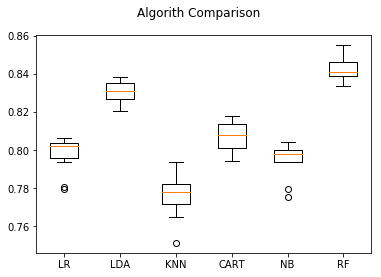

In [22]:
fig = plt.figure()
fig.suptitle('Algorith Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy: 84.13941348073085%
[[4524  427]
 [ 606  956]]
             precision    recall  f1-score   support

      <=50K       0.88      0.91      0.90      4951
       >50K       0.69      0.61      0.65      1562

avg / total       0.84      0.84      0.84      6513



# CONCLUSION

Logistic Regression 0.797797:
Linear Discriminant Analysis: 0.830121 :
K Nearest Neighbours: 0.775837 :
CART: 0.806895 :
Naive Baye's: 0.794572 :
Random Forests: 0.842291 

RANDOM FORESTS give better results : 0.84(approx)